# 리뷰 점수별 불만의 원인

In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
# from utils import *
pd.set_option('display.max_colwidth', None)

In [2]:
SILVERDEV_DIR = "../../../downloads/silver_dev"
review_inference = pd.read_csv(f"{SILVERDEV_DIR}/review_inference.tsv", sep='\t')
review_metadata = pd.read_csv(f"{SILVERDEV_DIR}/review_metadata.tsv", sep='\t')

In [3]:
TARGET_SCORE = [4,5]
target_review = review_metadata[review_metadata['review_score'].isin(TARGET_SCORE)]
target_review.shape

(76470, 5)

In [4]:
filter_condition = review_inference['review_id'].isin(target_review['review_id'])
target_review_comment = review_inference[filter_condition]
# target_review_comment.shape
target_review_comment.head(2)

,review_id,message_type,main_sentiment,eng,negative,neutral,positive
1,3c7388d3ed1f8a85fa544ef226af7605,review_comment_message,negative,"I bought 2 backpacks from the lannister site and from different partners. targaryen from mg delivered well before the estimated deadline, while the other one from pacific that comes from sc still hasn’t been delivered. congratulations to targaryen",0.930217,0.069168,0.000615
6,6dde0ff80b5bb0222341acdbe2469bba,review_comment_message,positive,"product delivered before the deadline, the watch is original and of great quality. it did not come in the original casio packaging, it came in a cardboard box written casio and did not come with the warranty. targaryen store",0.003108,0.001071,0.995821


[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/jmhwang/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jmhwang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jmhwang/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/jmhwang/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


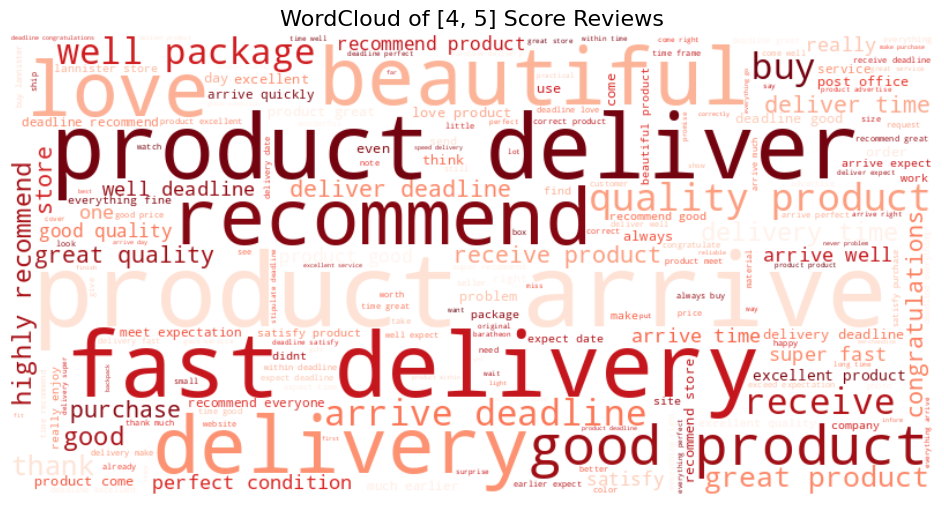

In [5]:
# Import libraries
import re
import sys
import nltk

from wordcloud import WordCloud
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download required NLTK data
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# # Setup NLTK data path (if needed)
# nltk.data.path.append('/home/jmhwang/nltk_data')
# sys.path.append("/home/jmhwang/nltk_data")

# Initialize components
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Define functions
def lemmatize_tokens(tokens):
    """Apply lemmatization to tokens"""
    return [lemmatizer.lemmatize(token, pos='v') for token in tokens]

def preprocess(text):
    """Preprocess text: lowercase, remove non-alphabetic chars, tokenize, remove stopwords, lemmatize"""
    if not isinstance(text, str):
        return ''
    
    # Convert to lowercase and remove non-alphabetic characters
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    
    # Tokenize
    tokens = word_tokenize(text)
    
    # Remove stopwords and short words
    tokens = [t for t in tokens if t not in stop_words and len(t) > 2]
    
    # Lemmatize
    tokens = lemmatize_tokens(tokens)
    
    return ' '.join(tokens)

# Process text data
text_corpus = target_review_comment['eng'].drop_duplicates().apply(preprocess).str.cat(sep=' ')

# Generate word cloud
wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white', 
    colormap='Reds'
).generate(text_corpus)

# Visualize
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f"WordCloud of {TARGET_SCORE} Score Reviews", fontsize=16)
plt.show()

In [6]:
from collections import Counter

# 모든 토큰 모으기
tokens = text_corpus.split()

# 빈도 계산
word_freq = Counter(tokens)
len(word_freq)

4939

In [7]:
# 상위 20개 키워드 추출
top_words = word_freq.most_common(20)
top_words = top_words[1:]   # top_words[0] == 'product'


In [8]:
words, freqs = zip(*top_words)

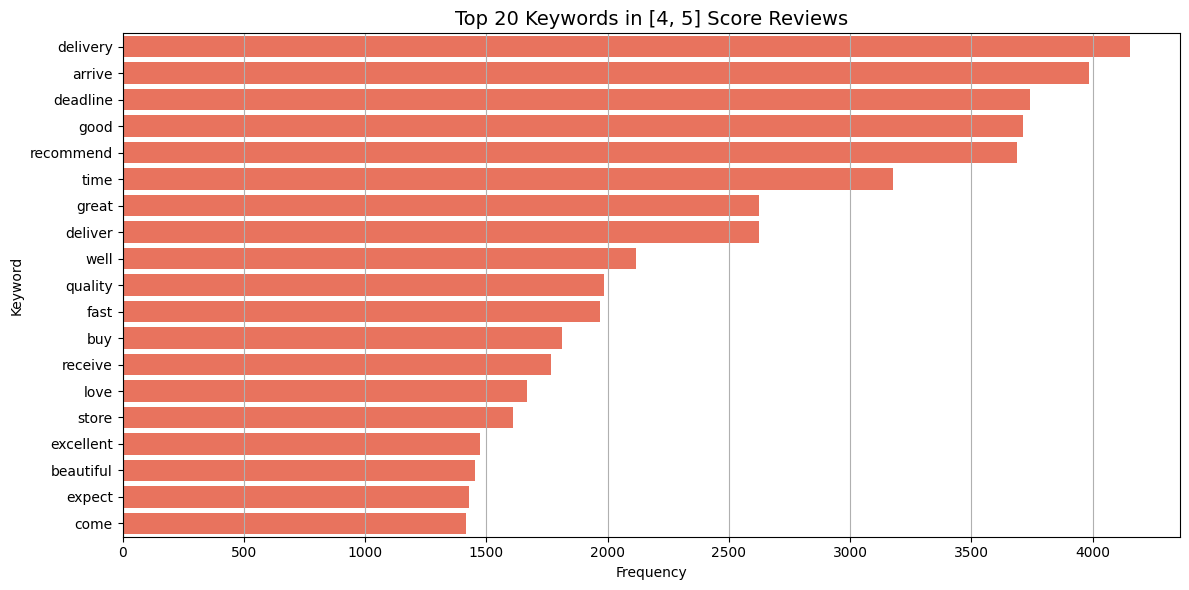

In [9]:
plt.figure(figsize=(12, 6))
sns.barplot(x=list(freqs), y=list(words), color='tomato')  # 수평 막대
plt.title(f"Top 20 Keywords in {TARGET_SCORE} Score Reviews", fontsize=14)
plt.xlabel("Frequency")
plt.ylabel("Keyword")
plt.grid(axis='x')
plt.tight_layout()
plt.show()


낮은 리뷰의 주요 원인: 배송

In [10]:
order_status_path = "../../../downloads/olist_redefined/order_status.tsv"
order_status_df = pd.read_csv(order_status_path, sep='\t')
# order_status_df.head()

In [11]:
estimated_path = "../../../downloads/olist_redefined/estimated_delivery_date.tsv"
est_df = pd.read_csv(estimated_path, sep='\t')
est_df.head()

,estimated_delivery_date,order_id
0,2016-09-30 00:00:00,809a282bbd5dbcabb6f2f724fca862ec
1,2016-10-04 00:00:00,bfbd0f9bdef84302105ad712db648a6c
2,2016-10-20 00:00:00,2e7a8482f6fb09756ca50c10d7bfc047
3,2016-10-24 00:00:00,e5215415bb6f76fe3b7cb68103a0d1c0
4,2016-10-25 00:00:00,71303d7e93b399f5bcd537d124c0bcfa


In [12]:
delivered_order_df = order_status_df[order_status_df['status'] == 'delivered_customer']
delivered_order_df

,timestamp,order_id,status
670,2016-10-11 13:46:32,36989eb07a0de2d3d3129eea35553875,delivered_customer
671,2016-10-11 14:46:49,7033745709b7cf1bac7d2533663592de,delivered_customer
705,2016-10-13 03:10:34,d1eb8e4e276a4eea13a5c462c0765e60,delivered_customer
707,2016-10-13 07:45:48,92b44b87f1f7670b8911c5f0e642435e,delivered_customer
712,2016-10-13 15:44:27,ac2b7c522d811acba0aa270ed3e112e4,delivered_customer
...,...,...,...
392844,2018-09-25 00:47:25,7d09831e67caa193da82cfea3bee7aa5,delivered_customer
392847,2018-09-27 02:24:33,a2b4be96b53022618030c17ed437604d,delivered_customer
392850,2018-10-02 00:18:50,b2997e1d7061605e9285496c581d1fbd,delivered_customer
392852,2018-10-11 16:41:14,450cb96c63e1e5b49d34f223f67976d2,delivered_customer


In [13]:
merged_order_df = pd.merge(delivered_order_df, est_df, on='order_id', how='inner')
merged_order_df

,timestamp,order_id,status,estimated_delivery_date
0,2016-10-11 13:46:32,36989eb07a0de2d3d3129eea35553875,delivered_customer,2016-12-06 00:00:00
1,2016-10-11 14:46:49,7033745709b7cf1bac7d2533663592de,delivered_customer,2016-11-30 00:00:00
2,2016-10-13 03:10:34,d1eb8e4e276a4eea13a5c462c0765e60,delivered_customer,2016-12-06 00:00:00
3,2016-10-13 07:45:48,92b44b87f1f7670b8911c5f0e642435e,delivered_customer,2016-11-25 00:00:00
4,2016-10-13 15:44:27,ac2b7c522d811acba0aa270ed3e112e4,delivered_customer,2016-11-29 00:00:00
...,...,...,...,...
96471,2018-09-25 00:47:25,7d09831e67caa193da82cfea3bee7aa5,delivered_customer,2018-08-20 00:00:00
96472,2018-09-27 02:24:33,a2b4be96b53022618030c17ed437604d,delivered_customer,2018-08-17 00:00:00
96473,2018-10-02 00:18:50,b2997e1d7061605e9285496c581d1fbd,delivered_customer,2018-08-14 00:00:00
96474,2018-10-11 16:41:14,450cb96c63e1e5b49d34f223f67976d2,delivered_customer,2018-06-27 00:00:00


In [14]:
merged_order_df['is_late'] = pd.to_datetime(merged_order_df['timestamp']) > pd.to_datetime(merged_order_df['estimated_delivery_date'])
merged_order_df

,timestamp,order_id,status,estimated_delivery_date,is_late
0,2016-10-11 13:46:32,36989eb07a0de2d3d3129eea35553875,delivered_customer,2016-12-06 00:00:00,False
1,2016-10-11 14:46:49,7033745709b7cf1bac7d2533663592de,delivered_customer,2016-11-30 00:00:00,False
2,2016-10-13 03:10:34,d1eb8e4e276a4eea13a5c462c0765e60,delivered_customer,2016-12-06 00:00:00,False
3,2016-10-13 07:45:48,92b44b87f1f7670b8911c5f0e642435e,delivered_customer,2016-11-25 00:00:00,False
4,2016-10-13 15:44:27,ac2b7c522d811acba0aa270ed3e112e4,delivered_customer,2016-11-29 00:00:00,False
...,...,...,...,...,...
96471,2018-09-25 00:47:25,7d09831e67caa193da82cfea3bee7aa5,delivered_customer,2018-08-20 00:00:00,True
96472,2018-09-27 02:24:33,a2b4be96b53022618030c17ed437604d,delivered_customer,2018-08-17 00:00:00,True
96473,2018-10-02 00:18:50,b2997e1d7061605e9285496c581d1fbd,delivered_customer,2018-08-14 00:00:00,True
96474,2018-10-11 16:41:14,450cb96c63e1e5b49d34f223f67976d2,delivered_customer,2018-06-27 00:00:00,True


In [15]:
from typing import List

def get_late_proportion_df(target_score: List[int], group_name: str):
    # 기존 로직 (데이터 필터링 및 병합)
    target_review = review_metadata[review_metadata['review_score'].isin(target_score)]
    target_order_id = target_review[['order_id']]
    merged_review = pd.merge(target_order_id, merged_order_df, on='order_id', how='inner')
    
    prop_df = merged_review['is_late'].value_counts(normalize=True).reset_index()
    prop_df.columns = ['is_late', 'proportion'] # 컬럼명 정리
    prop_df['score_group'] = group_name # 그룹 구분 컬럼 추가 (예: 'Low [1,2]')
    
    return prop_df

df_low = get_late_proportion_df([1, 2], 'Low Score [1, 2]')
df_high = get_late_proportion_df([4, 5], 'High Score [4, 5]')
df_neutral = get_late_proportion_df([3], 'Neutral Score [3]')

final_df = pd.concat([df_low, df_neutral, df_high], ignore_index=True)
final_df

,is_late,proportion,score_group
0,False,0.663158,"Low Score [1, 2]"
1,True,0.336842,"Low Score [1, 2]"
2,False,0.889977,Neutral Score [3]
3,True,0.110023,Neutral Score [3]
4,False,0.964956,"High Score [4, 5]"
5,True,0.035044,"High Score [4, 5]"


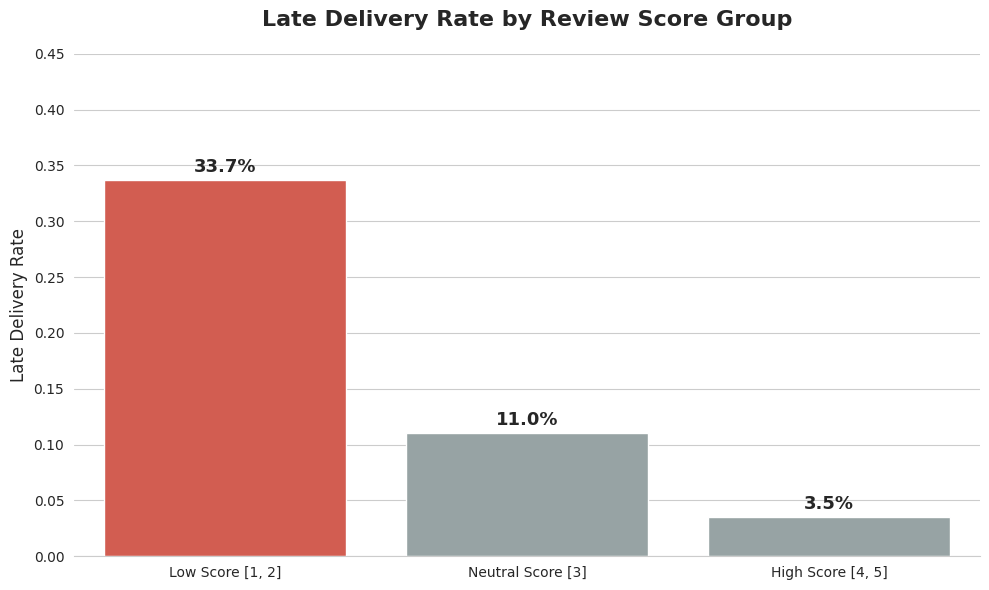

In [16]:
# 시각화: Low Score 강조 (Red) vs 나머지 (Grey)

# '지연(True)' 데이터만 추출
late_only_df = final_df[final_df['is_late'] == True].copy()

# Low Score는 빨간색, 나머지는 회색
custom_palette = {
    'Low Score [1, 2]': '#e74c3c',   # Red (Warning)
    'Neutral Score [3]': '#95a5a6',  # Grey (Context)
    'High Score [4, 5]': '#95a5a6'   # Grey (Context)
}

# 그래프에 표시될 순서 지정 (Low -> Neutral -> High)
order_list = ['Low Score [1, 2]', 'Neutral Score [3]', 'High Score [4, 5]']

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid") # 깔끔한 배경

ax = sns.barplot(
    x='score_group',
    y='proportion',
    hue='score_group',      # x와 동일하게 설정 (경고 방지)
    data=late_only_df,
    palette=custom_palette, # 위에서 정의한 색상 적용
    order=order_list,       # 순서 강제 고정
    legend=False            # 범례 제거
)

# (4) 디자인 디테일 (제목, 라벨, 숫자 표시)
plt.title('Late Delivery Rate by Review Score Group', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Late Delivery Rate', fontsize=12)
plt.xlabel('')
plt.ylim(0, 0.45) # Y축 여유있게 설정 (최대값에 따라 조절 가능)

# 막대 위에 퍼센트(%) 표시
for container in ax.containers:
    labels = [f'{v*100:.1f}%' for v in container.datavalues]
    ax.bar_label(container, labels=labels, fontsize=13, fmt='%.1f%%', padding=3, fontweight='bold')

# 왼쪽 테두리 제거 (모던한 느낌)
sns.despine(left=True)

plt.tight_layout()
plt.show()